<a href="https://colab.research.google.com/github/coolmechel/Notebook_2/blob/master/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANOMALY DETECTION ALGORITHMS FOR UNIVARIANT AND MULTI VARIANT OUTLIER DETECTION**


---

## INTRODUCTION


> Ever wondered how a fire alarm triggers? Or Google would ask that you confirm your email through SMS after logging in to your email from a different device?
You should know that these are machines acting out their protocols and doesn't require a human intervention. These are computer programs in the form of a setup rules that the computer follows and acts upon.
Anomaly or Outlier Detection is simply the identification of suspicious or rare events or observations which raises suspicions by differing significantly from the majority of the data. 
What this means is that, whenever there is a significant rise in temperature beyond a threshold, the fire alarm will go off and as for the email, whenever the user uses a new device not previous registered to that email, the algorithm treats it as an outlier and hence directs you to verify your email.

In this Notebook, I will be exploring: 

*   Industrial application of Anomaly Detections
*   Multi variant and Univariant algorithms and example codes.

## TYPES OF OUTLIERS
There are 3 types of outliers:


1.   Point outliers: Observations anomalous with respect to the majority of observations in a feature (univariant outlier)
2.   Contextual outliers: Observations considered anomalous given a specific context
3.   Collective outliers: A collection of observations anomalous but appear close to one another because they all have a similar anomalous value









## About The Dataset


> Iris Dataset is a famous dataset integrated to most machine learning libraries like Sklearn and Tensorflow. The dataset is a multivariant with 3 species:


*   Iris Versicolor
*   Iris Virginica
*   Iris Setosa

The dataset consists of 50 samples and 4 features mesured, Sepal Length, Sepal Width, Petal Length and Petal Width making up 150 observations which has found wild use in learning and testing most of the Machine Learning and AI algorithms.











---

## INDUSTRIAL APPLICATIONS OF ANOMALY DETECTION


> **FRAUD DETECTION:**
Modern fraud has taken new rules and has extended far beyond payment fraud and has gotten more sophisticated as companies battle to protect themselves and their information against identity theft, degredation of trust, fake user accounts and other safety issues especially in a platform based product.



> Large scale machine learning are providing reliable results by collecting related data for the fraudulent activities and studying the thousands of traits and patterns left by the fraudsters which otherwise might have remained unconnected in the vast ocean of data, these machine learning algorithms are able to detect anomalies and indicate propable incidences of abuse and notable companies like Airbnb and Jet.com are already adopting this technique to protect themselves from threats.


> **EQUIPMENT FAILURE:** This is another industrial wide application of outlier detection especially in real time. A complex equipment such as a boeing airplane or refinery has several components that are interconnected and well fitted with sensors that are sending out signals in real time to tell the state of their equipments, an alarm will usually go off when there is an anomaly in the transmitted signals. The signals of these equipments are fitted with thresholds and range for optimal and abnormal performances.


> **CYBERSECURITY** This is one of the major areas where this models and techniques has been deployed to flag off any form of anomality in the cyber ecosystem especially concerning National securities. We've the heard **firewalls** in China and how effective it is in restricting access to some cyber contents from foreigners. These and many more are the industrial application of this models.









Lets import our libraries and dependencies

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams

In [0]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [3]:
data = pd.read_csv('iris.data.csv', header=None, sep=',')
data.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## UNIVARIANT ANOMALY DETECTION

This type of anomaly detection is carried out on a labelled dataset with one predictant. For this example, we will be considering the features of our dataset and cluster them around itself using boxplots to test for any anomalies.

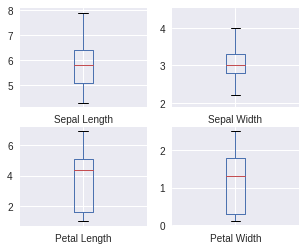

In [4]:
data.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

A **box plot** (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

Based on the above definition, any of sample data that falls outide of the box plot is simply regarded as an outlier or an anomaly.

From the above plots, we can alienate few points from the boxplot representing the Sepal Width that lies outside of the box plots and confortably regard themm as our anomalies.

If you take a closer look, you will discover that these points lies a little above length 4cm metric of the data

In [5]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width > 4)
data[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [6]:
Sepal_Width = X[:,1]
iris_outliers = (Sepal_Width < 2.05)
data[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


We can further confirm these points as outliers using the **Tukey Method**.

This method uses outlier labelling or a mathematical formular to mark points beyond a given range in the wiskers.

Interquartile Range (IQR) = The distance between the 1st quartile (at 25%) and the the 3rd quartile (at 75%)



*   a = Q1 - 1.5(IQR)
*   b = Q3 + 1.5(IQR)

**If the minimum value < a, or maximum value > b, then the variable is suspect for outliers.**



In [7]:
pd.options.display.float_format = '{:.1f}'.format
X_data = pd.DataFrame(X)
X_data.describe()

,0,1,2,3
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


From the above summary statistics, we can apply our formula and find the points which are possible outliers.



> IQR = 3.3 - 2.8 = 0.5



> (1.5)IQR = 0.75



> a = 2.8 - 0.75 = 2.05


> b = 3.3 + 0.75 = 4.05


> min = 2.0 and is < a,...*possible outlier*


> max = 4.4, and is > b, ...*possible outlier*











## MULTIVARIANT OUTLIER DETECTION USING DBSCAN

Multivariant outlier detection is a method used to find the outliers that show up within combinations of observations from two or more different variables.


**Methods for Multivariant Outlier Detection**



1.   Scatterplot matrices
2.   Boxplots
3.   DBSCAN

We will be focusing on the DBSCAN method in this Notebook.

### DBSCAN for Outlier Detection
This is an unspurvised machine learning algorithm that lusters core samples (dense areas of a dataset) and denotes non-core samples (sparse portions of the dataset)

DBSCAN can also be used in identifying collective outliers

**Note! Outliers should make up <= 5% of the total observation.** Adjust model parameters accordingly.

#### Important DBSCAN model parameter


*   **eps**: This is the maximum distance between two samples for them to be clustered in the same neighborhood. Choosing this parameter affects the clustering (start at esp = 0.1)
*   **min_samples**: This is the minimum number of a samples in a neighborhood for a data point to qualify as a core point (start with a very low sample size) Best practice is to adjust your parameters until less than 5% of the dataset has been labelled as outliers.




In [0]:
import seaborn as sb
from sklearn.cluster import DBSCAN
from collections import Counter

In [10]:
model = DBSCAN(eps=0.8, min_samples=19).fit(X)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [11]:
outliers_df = pd.DataFrame(X)
print(Counter(model.labels_))
print(outliers_df[model.labels_ ==-1])

Counter({1: 94, 0: 50, -1: 6})
      0   1   2   3
98  5.1 2.5 3.0 1.1
105 7.6 3.0 6.6 2.1
117 7.7 3.8 6.7 2.2
118 7.7 2.6 6.9 2.3
122 7.7 2.8 6.7 2.0
131 7.9 3.8 6.4 2.0


We can see that the min_sample was set to be 19 and the percentage of the dataset that was labelled outlier is 4% which is less than the 5% criteria, and the above dataframe shows the data points that the model has labelled as outliers.

Text(0.5,1,'DBSCAN for Outlier Detection')

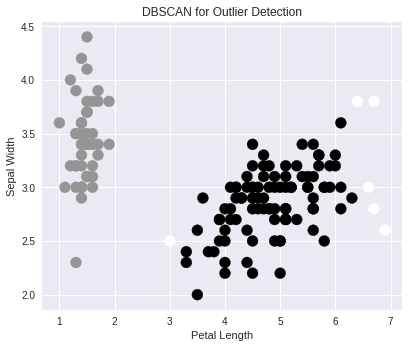

In [12]:
fig = plt.figure()
ax = fig.add_axes([-1, -1, 1, 1])

colors = model.labels_

ax.scatter(X[:,2], X[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

We can also see the beautiful plot we can generate from the DBSCAN clustering.

The plot distinctively clustered around 3 clusters and the less dense scattered cluster is our potential outliers.

## CONCLUSION

The best way to conclude this notebook will be by providing some real world products where this model has been deployed or perhaps some research that is ongoing in this field.



1.   [Tatvic's Anomaly Detection](https://youtu.be/2zJssv3CQs4)
2.   [Flowmon](https://www.flowmon.com/en/solutions/use-case/network-behavior-analysis-anomaly-detection)



